In [62]:
## Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 

<h2>Checking on Constant Object Data</h2>

In [63]:
## Reading Base Image
file=cv2.imread(os.path.join(os.getcwd(),"NB.png"))
print(f"Image Shape : {file.shape}")
base=cv2.cvtColor(file,cv2.COLOR_RGB2GRAY)

Image Shape : (769, 443, 3)


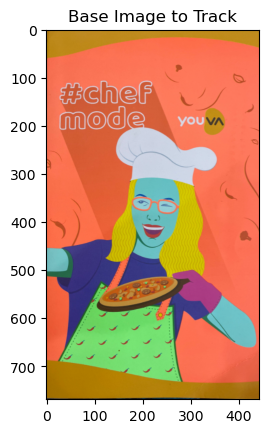

In [64]:
plt.imshow(file[:,:,::-1])
plt.title("Base Image to Track")
plt.show()

In [65]:
## Defining Flann Algorithm
index_params=dict(algorithm=0,trees=5)
search_params=dict()
flann=cv2.FlannBasedMatcher(index_params,search_params)


In [66]:
## Feature Matching
sift=cv2.xfeatures2d.SIFT_create()
base_kp,base_desc=sift.detectAndCompute(base,None) # to point the features on base image

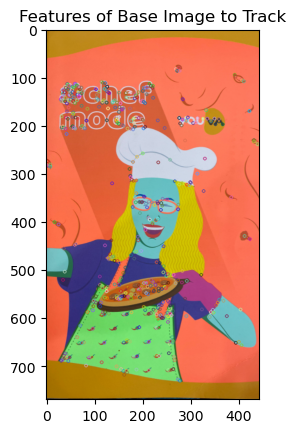

In [67]:
file=cv2.drawKeypoints(file,base_kp,file) # to get featured on image
plt.imshow(file[:,:,::-1])
plt.title("Features of Base Image to Track")
plt.show()

In [68]:
# For Live Camera 
cap=cv2.VideoCapture(0) 

while True:
    _,frame=cap.read()
    
    query_grayframe=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    query_kp,query_desc=sift.detectAndCompute(query_grayframe,None)# to point the features on Query_image/Every_Frame

    matches=flann.knnMatch(base_desc,query_desc,k=2) 
    
    good_points=[]
    # M and N are the Estimation of the features on Query and Base Image 
    for m,n in matches:
        if m.distance<0.7*n.distance:
            good_points.append(m)
            
    img3=cv2.drawMatches(base,base_kp,query_grayframe,query_kp,good_points,query_grayframe)
    
    if len(good_points)>10: ## if more than 10 features Matches
        
        query_pts=np.float32([base_kp[m.queryIdx].pt for m in good_points]).reshape(-1,1,2) 
        train_pts=np.float32([query_kp[m.trainIdx].pt for m in good_points]).reshape(-1,1,2) 

        matrix,mask=cv2.findHomography(query_pts,train_pts,cv2.RANSAC,5.0)
        matches_mask=mask.ravel().tolist()
        try:
            if (matrix==None):
                cv2.imshow("Homography",frame)
                continue
        except:
            pass
            

        h,w=base.shape
        pts=np.float32([[0,0],[0,h],[w,h],[w,0]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, matrix)

        #to draw a polygonm with color(255,0,0) and thickness 3
        homography=cv2.polylines(frame,[np.int32(dst)],True,(255,0,0),3)
        cv2.imshow("Homography",homography)
        
    else:
        cv2.imshow("Homography",frame)


    key=cv2.waitKey(1)
    if key==27:
        break

cap.release()
cv2.destroyAllWindows()

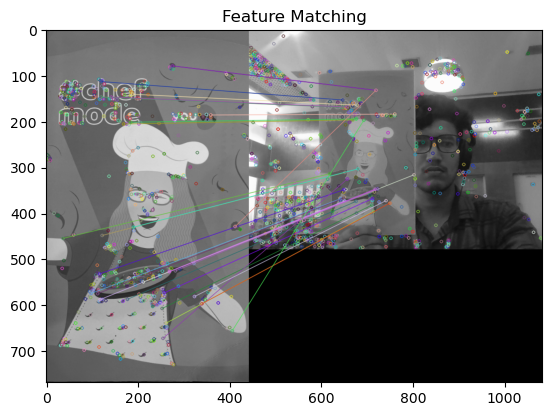

In [69]:
## Matching the Estimation of Features on Query Image
plt.imshow(img3)
plt.title("Feature Matching")
plt.show()

<h2>Checking on Face Data</h2>

In [70]:
## Reading Base Image
file=cv2.imread(os.path.join(os.getcwd(),"Face.jpg"))
print(f"Image Shape : {file.shape}")
base=cv2.cvtColor(file,cv2.COLOR_RGB2GRAY)

Image Shape : (395, 341, 3)


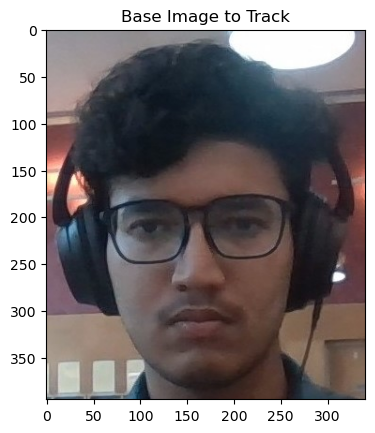

In [71]:
plt.imshow(file[:,:,::-1])
plt.title("Base Image to Track")
plt.show()

In [72]:
## Defining Flann Algorithm
index_params=dict(algorithm=0,trees=5)
search_params=dict()
flann=cv2.FlannBasedMatcher(index_params,search_params)


In [73]:
## Feature Matching
sift=cv2.xfeatures2d.SIFT_create()
base_kp,base_desc=sift.detectAndCompute(base,None) # to point the features on base image

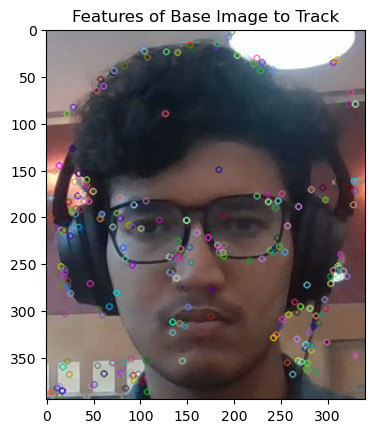

In [74]:
file=cv2.drawKeypoints(file,base_kp,file) # to get featured on image
plt.imshow(file[:,:,::-1])
plt.title("Features of Base Image to Track")
plt.show()

In [75]:
# For Live Camera 
cap=cv2.VideoCapture(0) 

while True:
    _,frame=cap.read()
    
    query_grayframe=cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
    query_kp,query_desc=sift.detectAndCompute(query_grayframe,None)# to point the features on Query_image/Every_Frame

    matches=flann.knnMatch(base_desc,query_desc,k=2) 
    
    good_points=[]
    # M and N are the Estimation of the features on Query and Base Image 
    for m,n in matches:
        if m.distance<0.7*n.distance:
            good_points.append(m)
            
    img3=cv2.drawMatches(base,base_kp,query_grayframe,query_kp,good_points,query_grayframe)
    
    if len(good_points)>10: ## if more than 10 features Matches
        
        query_pts=np.float32([base_kp[m.queryIdx].pt for m in good_points]).reshape(-1,1,2) 
        train_pts=np.float32([query_kp[m.trainIdx].pt for m in good_points]).reshape(-1,1,2) 

        matrix,mask=cv2.findHomography(query_pts,train_pts,cv2.RANSAC,5.0)
        matches_mask=mask.ravel().tolist()
        try:
            if (matrix==None):
                cv2.imshow("Homography",frame)
                continue
        except:
            pass
            

        h,w=base.shape
        pts=np.float32([[0,0],[0,h],[w,h],[w,0]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, matrix)

        #to draw a polygonm with color(255,0,0) and thickness 3
        homography=cv2.polylines(frame,[np.int32(dst)],True,(255,0,0),3)
        cv2.imshow("Homography",homography)
        
    else:
        cv2.imshow("Homography",frame)


    key=cv2.waitKey(1)
    if key==27:
        break

cap.release()
cv2.destroyAllWindows()

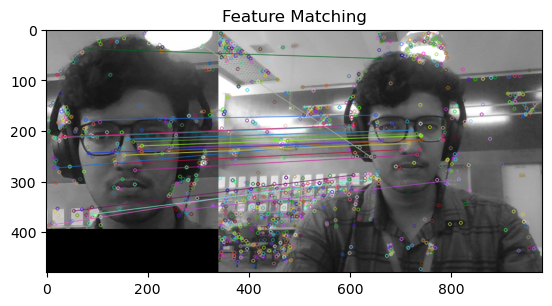

In [76]:
## Matching the Estimation of Features on Query Image
plt.imshow(img3)
plt.title("Feature Matching")
plt.show()